#  <center>**Digit Recognizer Using MLP and CNN**</center>
## <div style="text-align: right;"> ----5511 Final Project </div>

## 1. Project Topic

This project aims to develop a Digit Recognizer utilizing deep learning models for the classification of handwritten digits.



## 2. Data Overview

**Data Source**: https://www.kaggle.com/competitions/digit-recognizer/data

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

The data files `train.csv` and `test.csv` contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [1]:
# import libraries
import pandas as pd

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# load the train data
train = pd.read_csv("../input/digit-recognizer/train.csv")

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


**Data size**: 251.5 MB

**Data dimensions**: 42000 entries with 785 columns(label and pixel values)

**Data type**: int64

## 3. Exploratory Data Analysis

In [5]:
# Seperate X_Train and Y_Train
Y = train["label"]
X = train.drop(labels = ["label"],axis = 1)

In [8]:
# Check if there is any missing values
X.isnull().sum().sum()

0

There is no missing values in the train dataset. So we can safely go ahead.

In [9]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

Let's first take a look at some sample images and their labels.

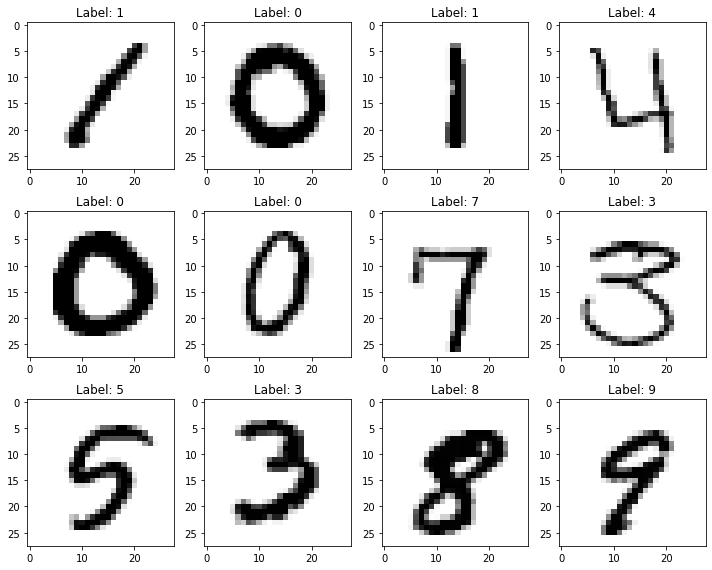

In [11]:
fig, axes = plt.subplots(3, 4, figsize=(10, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(X.values[i].reshape(28, 28), cmap=plt.cm.binary)
    ax.set_title('Label: {}'.format(Y[i]))

plt.tight_layout()
plt.show()

Next, let's examine the counts of each number.

Text(0.5, 1.0, 'Number of digit classes')

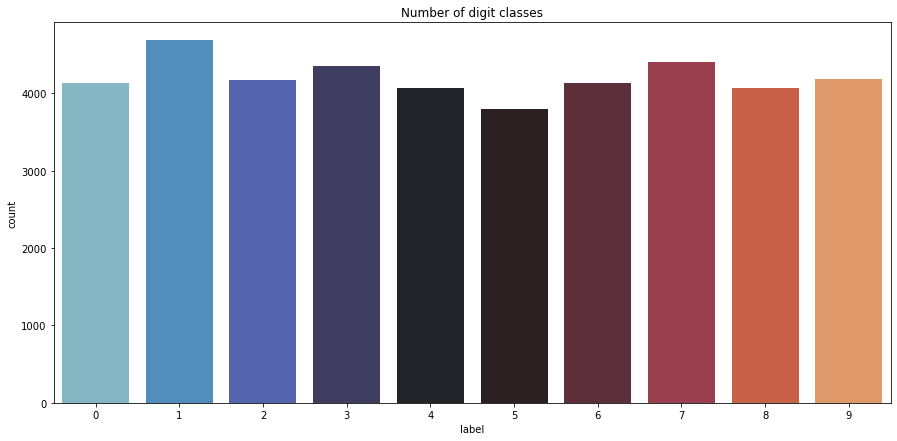

In [12]:
import seaborn as sns
plt.figure(figsize=(15,7))
g = sns.countplot(Y, palette="icefire")
plt.title("Number of digit classes")

From the graph, we can see that the data is balanced.

## 4. Data Preprocessing

In [13]:
# Transforming a 2d image into a numpy array (image 28*28 = 784 pixels)
x = X.values.reshape(42000, 784)

# Normalizing for values between 0 and 1
x = x.astype('float32')
x /= 255

In [14]:
num_classes = 10

# convert class labels (Y) into a one-hot encoded format
# eg. 8 => [0,0,0,0,0,0,0,0,1,0]
y = keras.utils.to_categorical(Y, num_classes)
print(y[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


Split the training and testing data

In [15]:
# Separating one part for training (90%) and another for validation (10%)
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=488)
print('Train number: {}'.format(len(x_train)))
print('Validation number: {}'.format(len(x_val)))

Train number: 37800
Validation number: 4200


## 5. Simple MLP Model

### 5.1. Define the Model

1. **Input Layer**:
   - Input shape: (784,)
   - The input layer consists of 784 neurons, which correspond to the flattened input data which are images with dimensions 28x28 pixels flattened into a vector of length 784.

2. **Hidden Layers**:
   - First Hidden Layer:
     - Neurons: 30
     - Activation Function: ReLU (Rectified Linear Unit)
     - This layer applies a ReLU activation function to the outputs of its 30 neurons.
     - Dropout: 20%
     - Dropout regularization is applied to prevent overfitting. It randomly sets 20% of the inputs to zero during training.
   
   - Second Hidden Layer:
     - Neurons: 20
     - Activation Function: ReLU
     - This layer applies a ReLU activation function to the outputs of its 20 neurons.
     - Dropout: 20%
     - Dropout regularization is again applied to prevent overfitting. It randomly sets 20% of the inputs to zero during training.

3. **Output Layer**:
   - Neurons: The number of output classes (represented by `num_classes`)
   - Activation Function: Softmax
   - The output layer applies a softmax activation function, which is commonly used for multi-class classification problems. It produces a probability distribution over the different classes.

In [16]:
#First model: simple MLP with 2 dropout layers

model = Sequential()
# first layer 30 neurons
model.add(Dense(30, activation='relu', input_shape=(784,)))
# Dropout 20%
model.add(Dropout(0.2))
# second layer 20 neurons
model.add(Dense(20, activation='relu'))
# Dropout 20%
model.add(Dropout(0.2))
# output layer 
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


### 5.2. Train the Model

In [17]:
# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [18]:
batch_size = 32
epochs = 30
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 3s 68us/sample - loss: 0.7433 - accuracy: 0.7590 - val_loss: 0.2915 - val_accuracy: 0.9148
Epoch 2/30
37800/37800 [==============================] - 2s 52us/sample - loss: 0.4406 - accuracy: 0.8679 - val_loss: 0.2382 - val_accuracy: 0.9276
Epoch 3/30
37800/37800 [==============================] - 2s 51us/sample - loss: 0.3878 - accuracy: 0.8843 - val_loss: 0.2164 - val_accuracy: 0.9369
Epoch 4/30
37800/37800 [==============================] - 2s 51us/sample - loss: 0.3553 - accuracy: 0.8958 - val_loss: 0.2004 - val_accuracy: 0.9412
Epoch 5/30
37800/37800 [==============================] - 2s 51us/sample - loss: 0.3439 - accuracy: 0.9009 - val_loss: 0.1981 - val_accuracy: 0.9410
Epoch 6/30
37800/37800 [==============================] - 2s 51us/sample - loss: 0.3249 - accuracy: 0.9069 - val_loss: 0.2031 - val_accuracy: 0.9405
Epoch 7/30
37800/37800 [==============================] -

### 5.3. Performance Analysis

I will first plot the loss and accuracy.

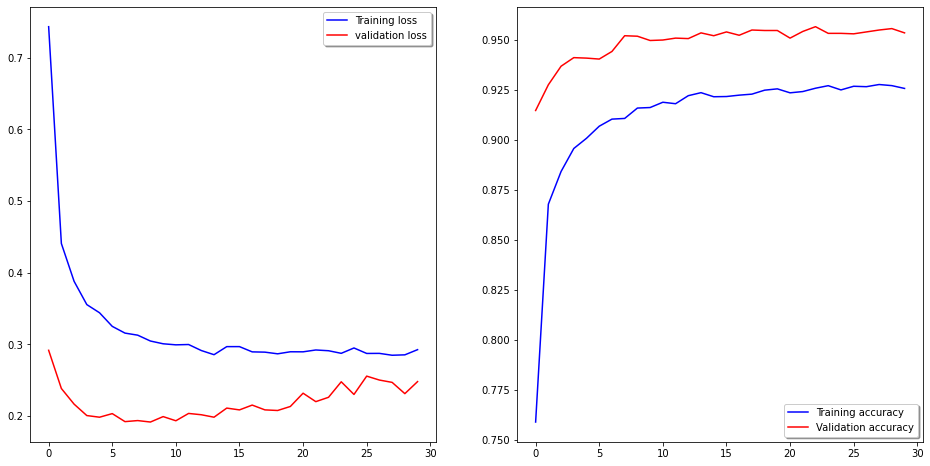

In [19]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Next I will make the confusion matrix.

In [20]:
import itertools
#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

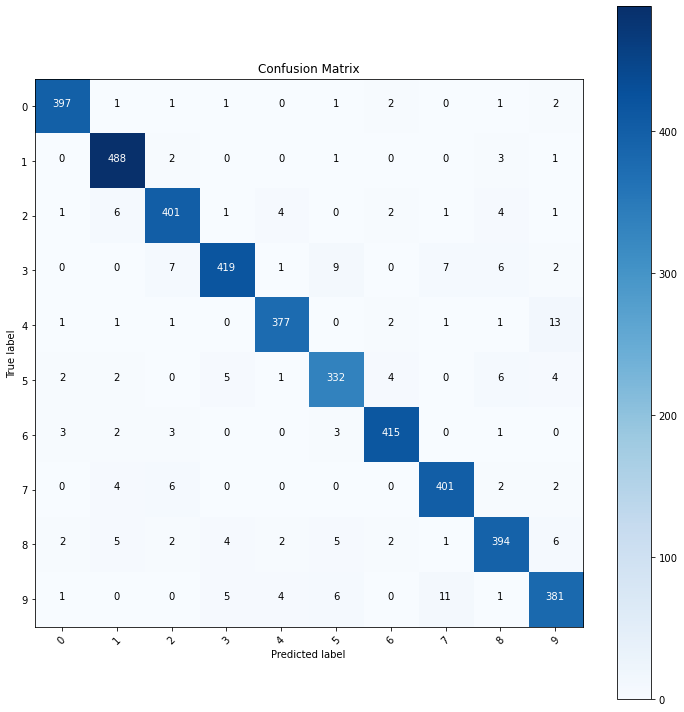

In [21]:
import numpy as np

y_pred = model.predict_classes(x_val)
y_test_c = np.argmax(y_val, axis=1)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#Confusion Matrix
cm = confusion_matrix(y_test_c, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

### 5.4. Results

The loss and accuracy graph above indicates that the validation accuracy is higher than the training accuracy right from the start and remains consistently higher throughout the training process. One possible reason is the regularization effect.

**Regularization Effects**: Dropout is a form of regularization that is only active during training. This means during training, some neurons are "dropped," making it harder for the network to fit the data (which is good for generalization). However, during validation, all neurons are active, and the network can use its full capacity to make predictions.

To test this hypothesis, I decided to use a MLP without any dropout layer.

## 6. MLP without Dropout Layers

In [22]:
model_1 = Sequential()
# first layer 30 neurons
model_1.add(Dense(30, activation='relu', input_shape=(784,)))
# second layer 20 neurons
model_1.add(Dense(20, activation='relu'))
# output layer 
model_1.add(Dense(num_classes, activation='softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Train the model
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [24]:
history_1 = model_1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 2s 62us/sample - loss: 0.4512 - accuracy: 0.8695 - val_loss: 0.2291 - val_accuracy: 0.9329
Epoch 2/30
37800/37800 [==============================] - 2s 48us/sample - loss: 0.2172 - accuracy: 0.9365 - val_loss: 0.1830 - val_accuracy: 0.9481
Epoch 3/30
37800/37800 [==============================] - 2s 48us/sample - loss: 0.1711 - accuracy: 0.9495 - val_loss: 0.1690 - val_accuracy: 0.9519
Epoch 4/30
37800/37800 [==============================] - 2s 48us/sample - loss: 0.1471 - accuracy: 0.9568 - val_loss: 0.1454 - val_accuracy: 0.9610
Epoch 5/30
37800/37800 [==============================] - 2s 47us/sample - loss: 0.1314 - accuracy: 0.9606 - val_loss: 0.1441 - val_accuracy: 0.9595
Epoch 6/30
37800/37800 [==============================] - 2s 48us/sample - loss: 0.1168 - accuracy: 0.9649 - val_loss: 0.1415 - val_accuracy: 0.9631
Epoch 7/30
37800/37800 [==============================] -

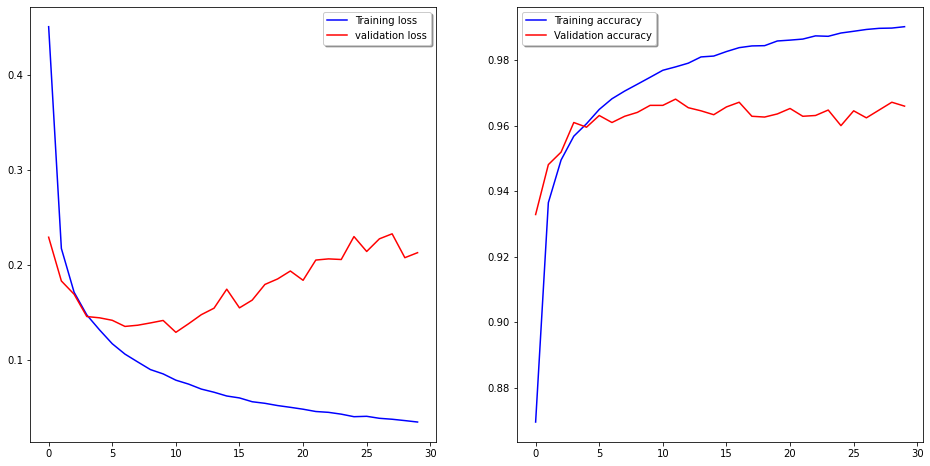

In [25]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history_1.history['loss'], color='b', label="Training loss")
ax[0].plot(history_1.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_1.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

As we can see from the graph, MLP without dropout layers showed signs of overfitting as the training accuracy keeps increasing while the validation accuracy remains unchanged. This is consistent with what I expected, as dropout is always needed to prevent overfitting.

Nevertheless, the accuracy of the MLP without dropout yielded a higher validation accuracy (0.9660) compared to the MLP with two dropout layers (0.9536), suggesting that incorporating two dropout layers might be excessive.

Next I will train a MLP with only one dropout layer.

## 7. MLP with One Dropout Layer

In [26]:
model_2 = Sequential()
# first layer 30 neurons
model_2.add(Dense(30, activation='relu', input_shape=(784,)))
# second layer 20 neurons
model_2.add(Dense(20, activation='relu'))
# Dropout 20%
model_2.add(Dropout(0.2))
# output layer 
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_7 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Train the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [28]:
history_2 = model_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 2s 62us/sample - loss: 0.6195 - accuracy: 0.8128 - val_loss: 0.2555 - val_accuracy: 0.9260
Epoch 2/30
37800/37800 [==============================] - 2s 49us/sample - loss: 0.3288 - accuracy: 0.9045 - val_loss: 0.1928 - val_accuracy: 0.9440
Epoch 3/30
37800/37800 [==============================] - 2s 50us/sample - loss: 0.2701 - accuracy: 0.9208 - val_loss: 0.1732 - val_accuracy: 0.9469
Epoch 4/30
37800/37800 [==============================] - 2s 50us/sample - loss: 0.2391 - accuracy: 0.9304 - val_loss: 0.1564 - val_accuracy: 0.9543
Epoch 5/30
37800/37800 [==============================] - 2s 49us/sample - loss: 0.2164 - accuracy: 0.9371 - val_loss: 0.1510 - val_accuracy: 0.9555
Epoch 6/30
37800/37800 [==============================] - 2s 48us/sample - loss: 0.2055 - accuracy: 0.9400 - val_loss: 0.1416 - val_accuracy: 0.9602
Epoch 7/30
37800/37800 [==============================] -

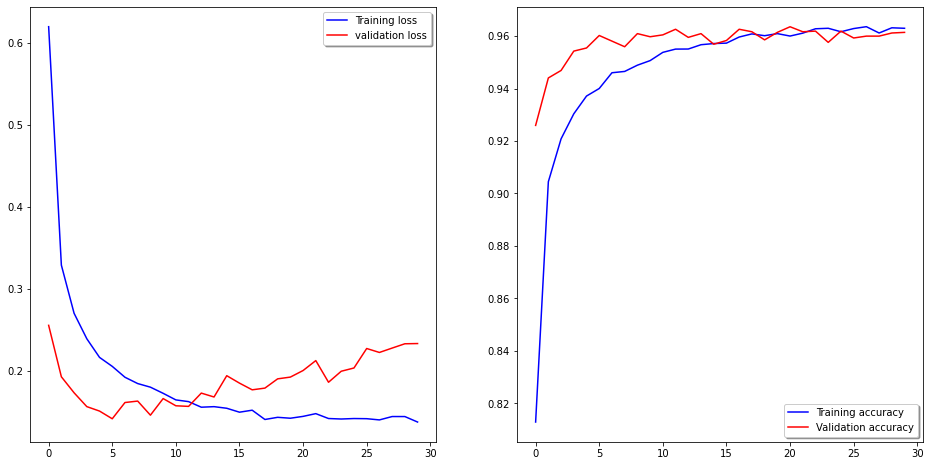

In [29]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history_2.history['loss'], color='b', label="Training loss")
ax[0].plot(history_2.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_2.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

The loss plot illustrates a scenario where the training loss steadily declines, while the validation loss starts to increase, indicating overfitting.

To address this, I will implement early stopping.

### 7.1 Early Stopping

In [30]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_3 = Sequential()
# first layer 30 neurons
model_3.add(Dense(30, activation='relu', input_shape=(784,)))
# second layer 20 neurons
model_3.add(Dense(20, activation='relu'))
# Dropout 20%
model_3.add(Dropout(0.2))
# output layer 
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

# Train the model with early stopping
model_3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_3 = model_3.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_val, y_val),
                        callbacks=[early_stopping])


Using TensorFlow backend.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________
Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 2s 65us/sample - loss: 0.6217 - accuracy: 0.8103 - val_loss: 0.2494 - val_accuracy: 0.9236
Epoch 2/30
37800/37800 [==========================

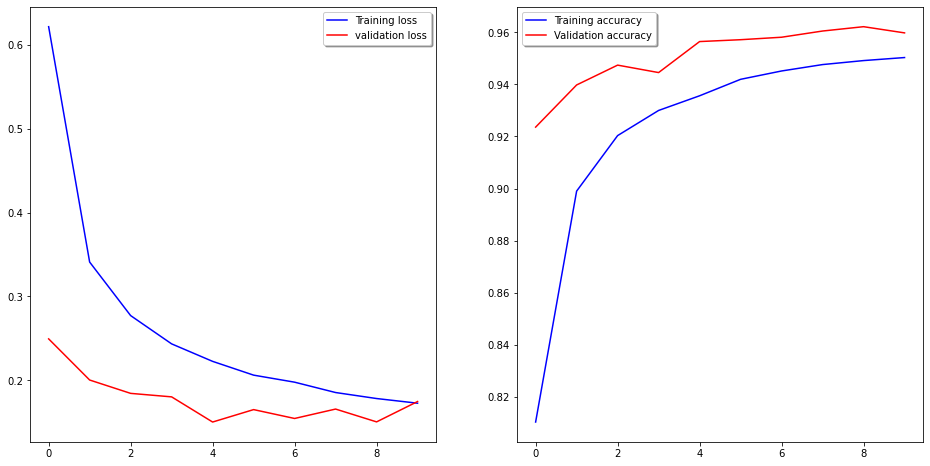

In [31]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history_3.history['loss'], color='b', label="Training loss")
ax[0].plot(history_3.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_3.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_3.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Both plots look fine and the model has a accuracy of 0.9598 when epoch = 10.

## 8. CNN Model

In this section, I will implement a CNN model and compare its performance with MLP.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [36]:
X_train = X.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y, num_classes = 10)

In [37]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=133)

This Convolutional Neural Network (CNN) architecture consists of the following layers:

1. **Input Layer**: The input layer accepts grayscale images with a size of 28x28 pixels and 1 channel (since the images are grayscale).

2. **Convolutional Layers (with ReLU activation)**:
   - The first convolutional layer (`Conv2D`) has 32 filters, each with a kernel size of 5x5 pixels. It uses the ReLU activation function.
   - The second convolutional layer (`Conv2D`) has 32 filters with the same kernel size and activation function as the first layer.
   - After each pair of convolutional layers, there's a `MaxPooling2D` layer with a pool size of 2x2 pixels to downsample the feature maps.
   - Each pair of convolutional layers is followed by a `Dropout` layer with a dropout rate of 0.25. Dropout is a regularization technique used to prevent overfitting by randomly dropping a fraction of input units during training.

3. **Another set of Convolutional Layers (with ReLU activation)**:
   - Similar to the first set, this part includes two convolutional layers with 64 filters each, both with a kernel size of 3x3 pixels and ReLU activation.
   - Again, after the convolutional layers, there's a `MaxPooling2D` layer with a pool size of 2x2 pixels and a `Dropout` layer with a dropout rate of 0.25.

4. **Flatten Layer**: This layer flattens the output of the previous layer into a 1D array. It prepares the data for input into the fully connected layers.

5. **Fully Connected (Dense) Layers (with ReLU activation)**:
   - The first dense layer (`Dense`) consists of 256 neurons with ReLU activation. It's a fully connected layer that learns complex patterns in the data.
   - This dense layer is followed by a `Dropout` layer with a dropout rate of 0.5 for regularization.

6. **Output Layer (Dense) (with Softmax activation)**:
   - The output layer consists of 10 neurons, corresponding to the 10 possible classes in the classification task (assuming it's a classification problem). It uses the softmax activation function to output probabilities for each class.

Overall, this CNN architecture is designed for image classification tasks, leveraging convolutional layers to extract features from input images, pooling layers to reduce dimensionality, and fully connected layers to perform classification based on the extracted features. Dropout layers are used for regularization to prevent overfitting.

In [38]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model_4 = Sequential()

model_4.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model_4.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.25))


model_4.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_4.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model_4.add(Dropout(0.25))


model_4.add(Flatten())
model_4.add(Dense(256, activation = "relu"))
model_4.add(Dropout(0.5))
model_4.add(Dense(10, activation = "softmax"))

In [66]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [39]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [40]:
# Compile the model
model_4.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [41]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [43]:
history_4 = model_4.fit(X_train, Y_train, batch_size = 32, epochs = 10, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 126s - loss: 0.3546 - accuracy: 0.9127 - val_loss: 0.0929 - val_accuracy: 0.9726
Epoch 2/10
 - 125s - loss: 0.1388 - accuracy: 0.9632 - val_loss: 0.1625 - val_accuracy: 0.9686
Epoch 3/10
 - 125s - loss: 0.1451 - accuracy: 0.9654 - val_loss: 0.0932 - val_accuracy: 0.9805
Epoch 4/10
 - 124s - loss: 0.1558 - accuracy: 0.9647 - val_loss: 0.0880 - val_accuracy: 0.9788
Epoch 5/10
 - 124s - loss: 0.1814 - accuracy: 0.9617 - val_loss: 0.1370 - val_accuracy: 0.9690
Epoch 6/10
 - 124s - loss: 0.2155 - accuracy: 0.9570 - val_loss: 0.1562 - val_accuracy: 0.9774
Epoch 7/10
 - 124s - loss: 0.2396 - accuracy: 0.9546 - val_loss: 0.0874 - val_accuracy: 0.9786
Epoch 8/10
 - 124s - loss: 0.2754 - accuracy: 0.9502 - val_loss: 0.1398 - val_accuracy: 0.9745
Epoch 9/10
 - 124s - loss: 0.3200 - accuracy: 0.9441 - val_loss: 0.1010 - val_accuracy: 0.9781
Epoch 10/10
 - 124s - loss: 0.3368 - accuracy: 0.9413 - val_loss: 0.1034 - val_accuracy: 0.9802


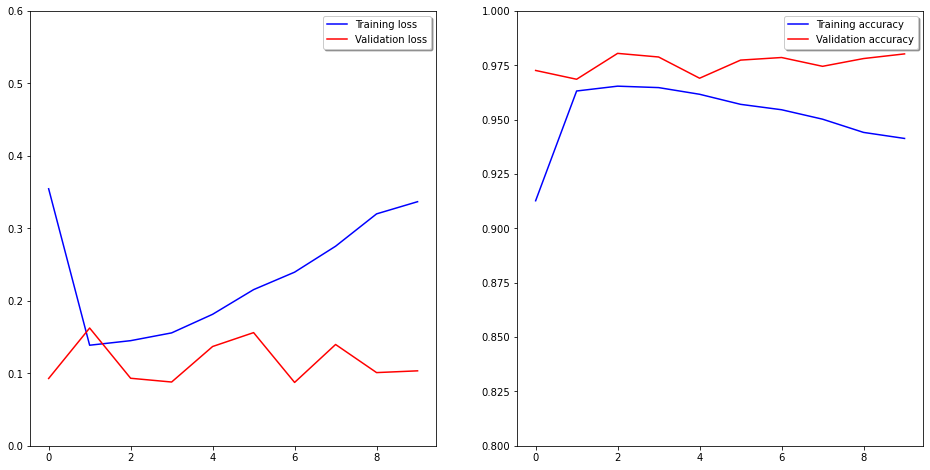

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].plot(history_4.history['loss'], color='b', label="Training loss")
ax[0].plot(history_4.history['val_loss'], color='r', label="Validation loss", axes=ax[0])
ax[0].legend(loc='best', shadow=True)
ax[0].set_ylim(0, 0.6)

ax[1].plot(history_4.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_4.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_ylim(0.8, 1.0)

plt.show()

Due to the extended training duration required by the CNN model and the size of our dataset, I limited the training to 10 epochs for efficiency.

Despite this limitation, both plots appear satisfactory, with the CNN model achieving a notable validation accuracy of 0.9802, surpassing the performance of previous MLP models.

Observing the loss plot, there seems to be a gradual increase in the training loss, although I speculate this to be a normal fluctuation. With an increase in the number of epochs, the training loss should eventually decrease.

## 9. Results and Analysis

In [64]:
print("Accuracy of MLP with 2 dropout layers: {:.4f}".format(history.history['val_accuracy'][-1]))
print("Accuracy of MLP without dropout layers: {:.4f}".format(history_1.history['val_accuracy'][-1]))
print("Accuracy of MLP with 1 dropout layer: {:.4f}".format(history_2.history['val_accuracy'][-1]))
print("Accuracy of MLP with 1 dropout layer, early stopping: {:.4f}".format(history_3.history['val_accuracy'][-1]))
print("Accurary of CNN: {:.4f}".format(history_4.history['val_accuracy'][-1]))

Accuracy of MLP with 2 dropout layers: 0.9536
Accuracy of MLP without dropout layers: 0.9660
Accuracy of MLP with 1 dropout layer: 0.9614
Accuracy of MLP with 1 dropout layer, early stopping: 0.9598
Accurary of CNN: 0.9802


Here is what I found:
* CNN model achieved higher accuracy than MLP models.
* Dropout regularization slightly decreased the accuracy of the MLP models, although it helped prevent overfitting.
* Early stopping did not significantly improve the accuracy of the MLP model.

## 10. Submission

In this section, I will generate five `submission.csv` files for the five models I used and submit them to Kaggle to assess their scores.

In [56]:
test = pd.read_csv("../input/digit-recognizer/test.csv")
x_test = test.values.reshape(len(test),784)
x_test = x_test.astype('float32')
x_test /= 255
# model
y_pred = model.predict_classes(x_test)
results = pd.Series(y_pred,name="Label")
submission = pd.concat([pd.Series(range(1,len(y_pred)+1),name = "ImageId"),results],axis = 1)
submission.to_csv("model.csv",index=False)

In [57]:
# model_1
y_pred_1 = model_1.predict_classes(x_test)
results_1 = pd.Series(y_pred_1,name="Label")
submission_1 = pd.concat([pd.Series(range(1,len(y_pred_1)+1),name = "ImageId"),results_1],axis = 1)
submission_1.to_csv("model_1.csv",index=False)

In [58]:
# model_2
y_pred_2 = model_2.predict_classes(x_test)
results_2 = pd.Series(y_pred_2,name="Label")
submission_2 = pd.concat([pd.Series(range(1,len(y_pred_2)+1),name = "ImageId"),results_2],axis = 1)
submission_2.to_csv("model_2.csv",index=False)

In [59]:
# model_3
y_pred_3 = model_3.predict_classes(x_test)
results_3 = pd.Series(y_pred_3,name="Label")
submission_3 = pd.concat([pd.Series(range(1,len(y_pred_3)+1),name = "ImageId"),results_3],axis = 1)
submission_3.to_csv("model_3.csv",index=False)

In [60]:
test = test / 255.0
test = test.values.reshape(-1,28,28,1)
# predict results
results_4 = model_4.predict(test)

# select the indix with the maximum probability
results_4 = np.argmax(results_4,axis = 1)

results_4 = pd.Series(results_4,name="Label")

submission_4 = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results_4],axis = 1)

submission_4.to_csv("model_4.csv",index=False)

The following image shows the results

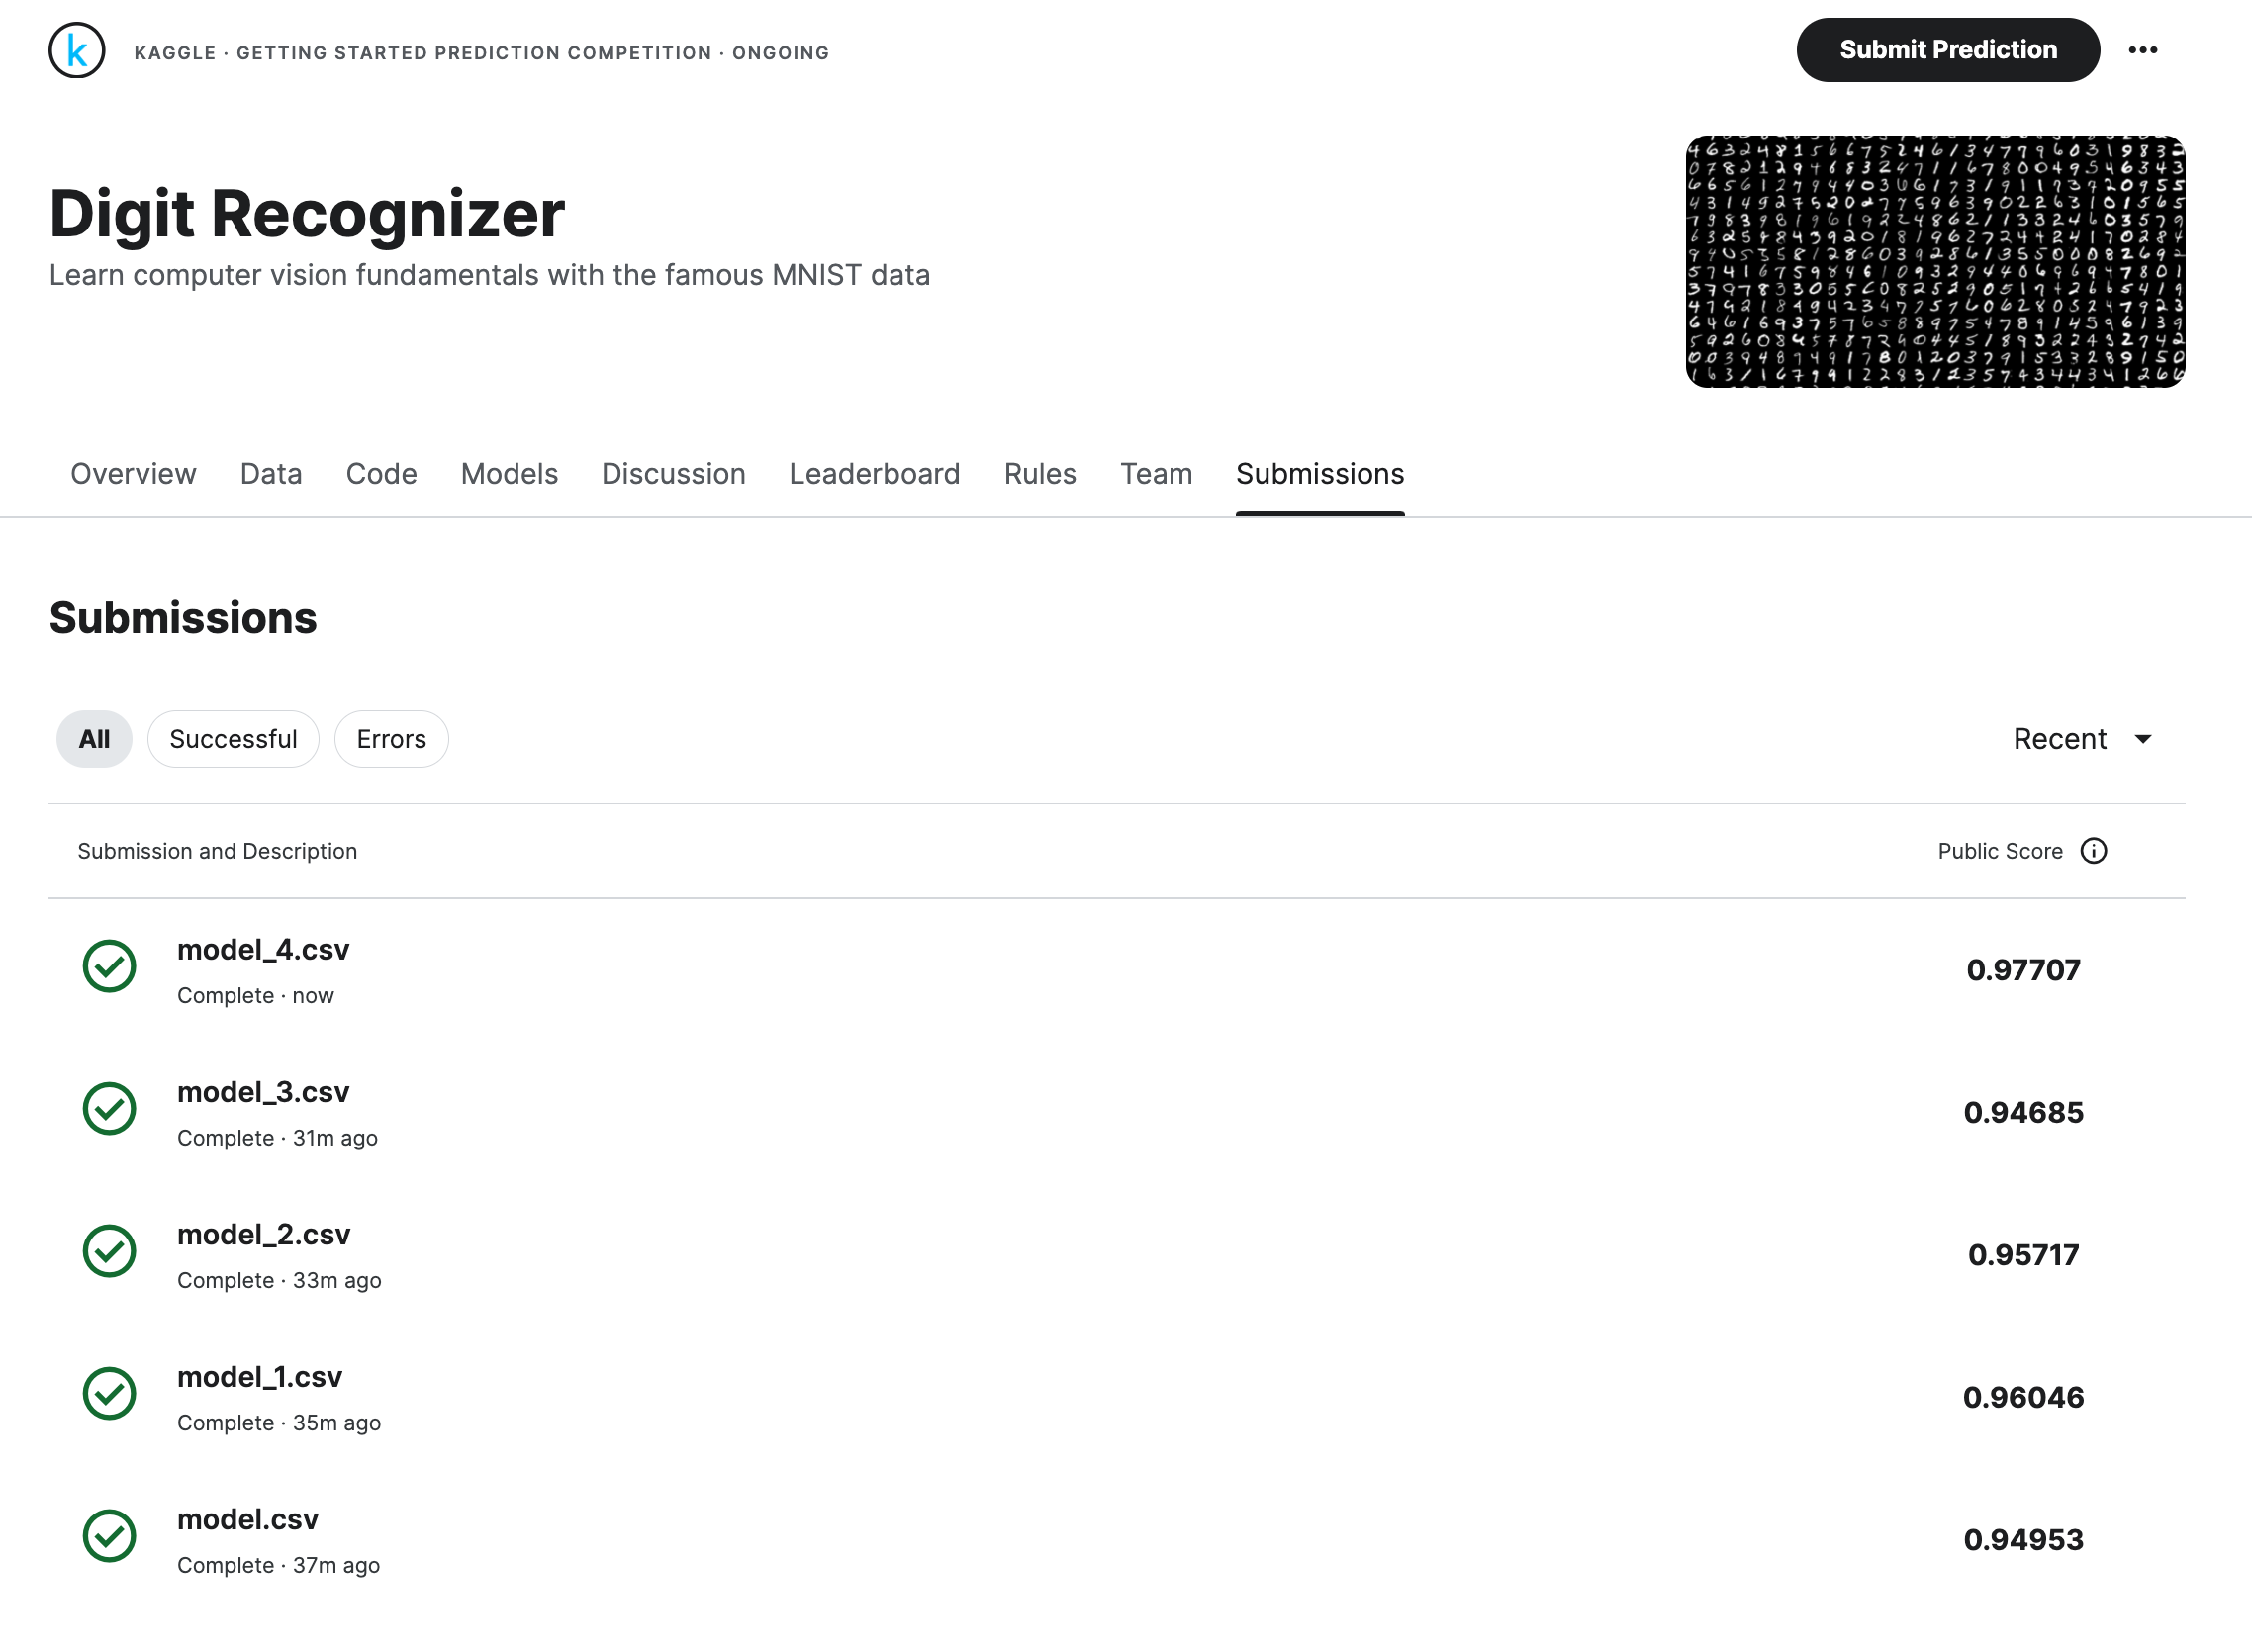

In [62]:
from IPython.display import Image
Image(filename='/kaggle/input/scores/Digit_Recognizer_Score.PNG')

## 11. Conclusion

Here are the models that I used in this project and their performance:

`model`: MLP with 2 dropout layers: 0.9536(Validation Accuracy) ; 0.94953(Score) 

`model_1`:MLP without dropout: 0.9660(Validation Accuracy) ; 0.96046(Score)  

`model_2`:MLP with 1 dropout layer: 0.9614(Validation Accuracy) ; 0.95717(Score)  

`model_3`:MLP with 1 dropout layer, early stopping: 0.9598(Validation Accuracy) ; 0.94685(Score)  

`model_4`:CNN: 0.9802(Validation Accuracy) ; 0.97707(Score) 


Here is what I found:

1. CNN model has better performance than MLP models. It could be due to their ability to automatically learn hierarchical features from images, exploit translation invariance, and preserve spatial hierarchy. CNNs are more robust to variations in the input data, making them better suited for recognizing digits with varying styles, orientations, and positions within the image.

2. Dropout regularization slightly decreased the accuracy of the MLP models. It introduces randomness by randomly setting a fraction of neuron activations to zero during training, which can disrupt the learning process. While dropout is effective in preventing overfitting by encouraging the network to learn more robust features, it may also inadvertently remove valuable information during training, leading to a decrease in accuracy.

3. Early stopping did not significantly improve the accuracy of the MLP model. It halts the training process when the performance of the model on a validation dataset starts to deteriorate, based on predefined criteria. However, stopping prematurely can prevent the model from reaching its optimal performance by terminating training before it converges to the best solution. This premature halting may lead to a decrease in accuracy as the model hasn't fully learned the underlying patterns in the data.